In [1]:
import scSherlock as sh
import scanpy as sc

/home/croizer/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
  
adata = sc.read_h5ad('/home/croizer/Documents/02_Analysis/02_scSherlock/hao_2021_SCT_subset.h5ad')
cell_type_column = "celltype.l3"
patient_column = "donor"



In [4]:

# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=20,
    n_jobs=15
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_ctype=cell_type_column,
    column_patient=patient_column,
    config=config
)

# Run the algorithm
#top_markers = scherlock.run(method="theoric")
top_markers = scherlock.run(method="empiric")


2025-03-24 11:35:16,510 - ScSherlock - INFO - Pre-filtering genes...
2025-03-24 11:35:16,511 - ScSherlock - INFO - Original dataset: 53921 cells, 20729 genes
2025-03-24 11:35:19,927 - ScSherlock - INFO - Filtered dataset: 53921 cells, 18395 genes
2025-03-24 11:35:19,927 - ScSherlock - INFO - Removed 2334 genes with low expression
2025-03-24 11:35:19,928 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (53921, 18395) data matrix
2025-03-24 11:35:19,933 - ScSherlock - INFO - Calculating theoretical scores...
Aggregating Samples: 100%|██████████| 464/464 [00:00<00:00, 1408.17it/s]
/home/croizer/Documents/02_Analysis/02_scSherlock/scSherlock/scSherlock/scSherlock/sherlock_obj.py:495: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype

{'CD4 Naive':                    1        10        25  aggregated      exp_prop
AC008892.1 -0.069747  0.460899  0.453581    0.281577  1.650674e-05
GPRC5B     -0.016520  0.396552  0.457627    0.279220  3.115575e-06
SORCS3     -0.013507  0.210000  0.233129    0.143207  1.848722e-06
KRT73      -0.053788  0.241250  0.241791    0.143084  8.930715e-06
NKD1       -0.037803  0.245318  0.191812    0.133109  6.801615e-06
...              ...       ...       ...         ...           ...
MEIOC      -0.001998  0.004057  0.009494    0.003851  1.298856e-06
AC012360.1 -0.002857  0.000000  0.012672    0.003272  7.793259e-07
AC010273.1 -0.001901  0.006306  0.003954    0.002786  1.371304e-06
AL606760.2 -0.002160  0.000000  0.006536    0.001459  1.220073e-06
NPR2       -0.023413  0.011196  0.008724   -0.001165  2.332724e-06

[72 rows x 5 columns], 'CD14 Mono':                    1        10        25  aggregated  exp_prop
FOLR3      -0.088652  0.987590  0.992965    0.630634  0.000065
CRISPLD2   -0.09282

In [ ]:
scherlock.plot_theoretical_vs_empirical(n_genes=2)

ValueError: Both theoretical and empirical scores must be available. Run with method='empiric'

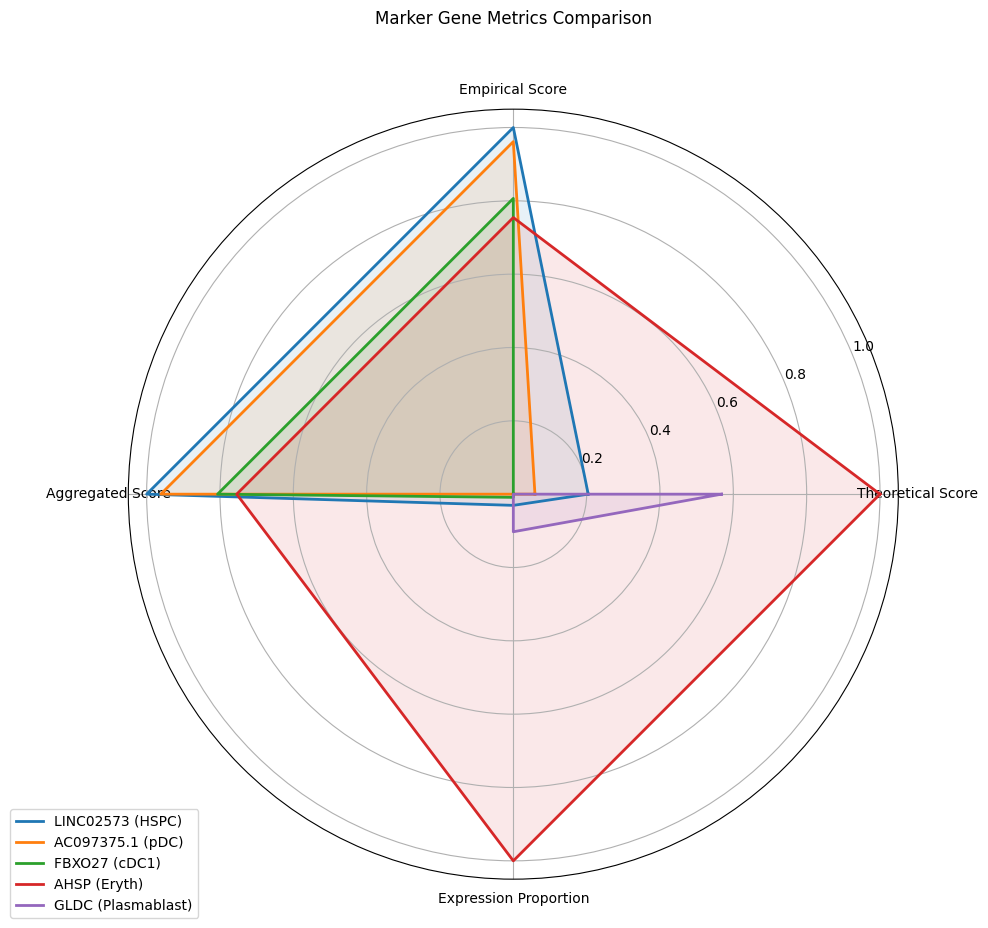

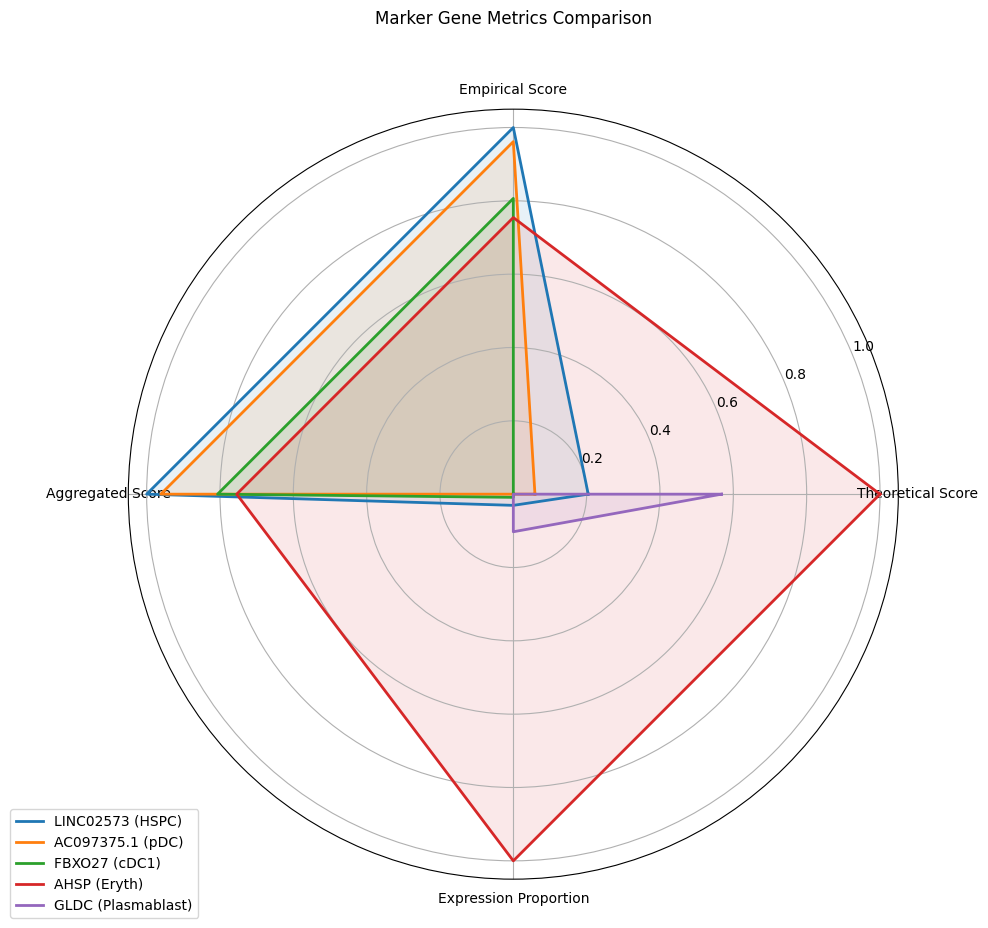

In [ ]:
scherlock.plot_marker_radar()

In [ ]:
scherlock.export_markers(n_markers=1)

TypeError: ScSherlock.export_markers() got an unexpected keyword argument 'n_markers'

2025-03-24 11:36:39,306 - ScSherlock - INFO - Plotting 67 genes for 37 cell types using empiric model


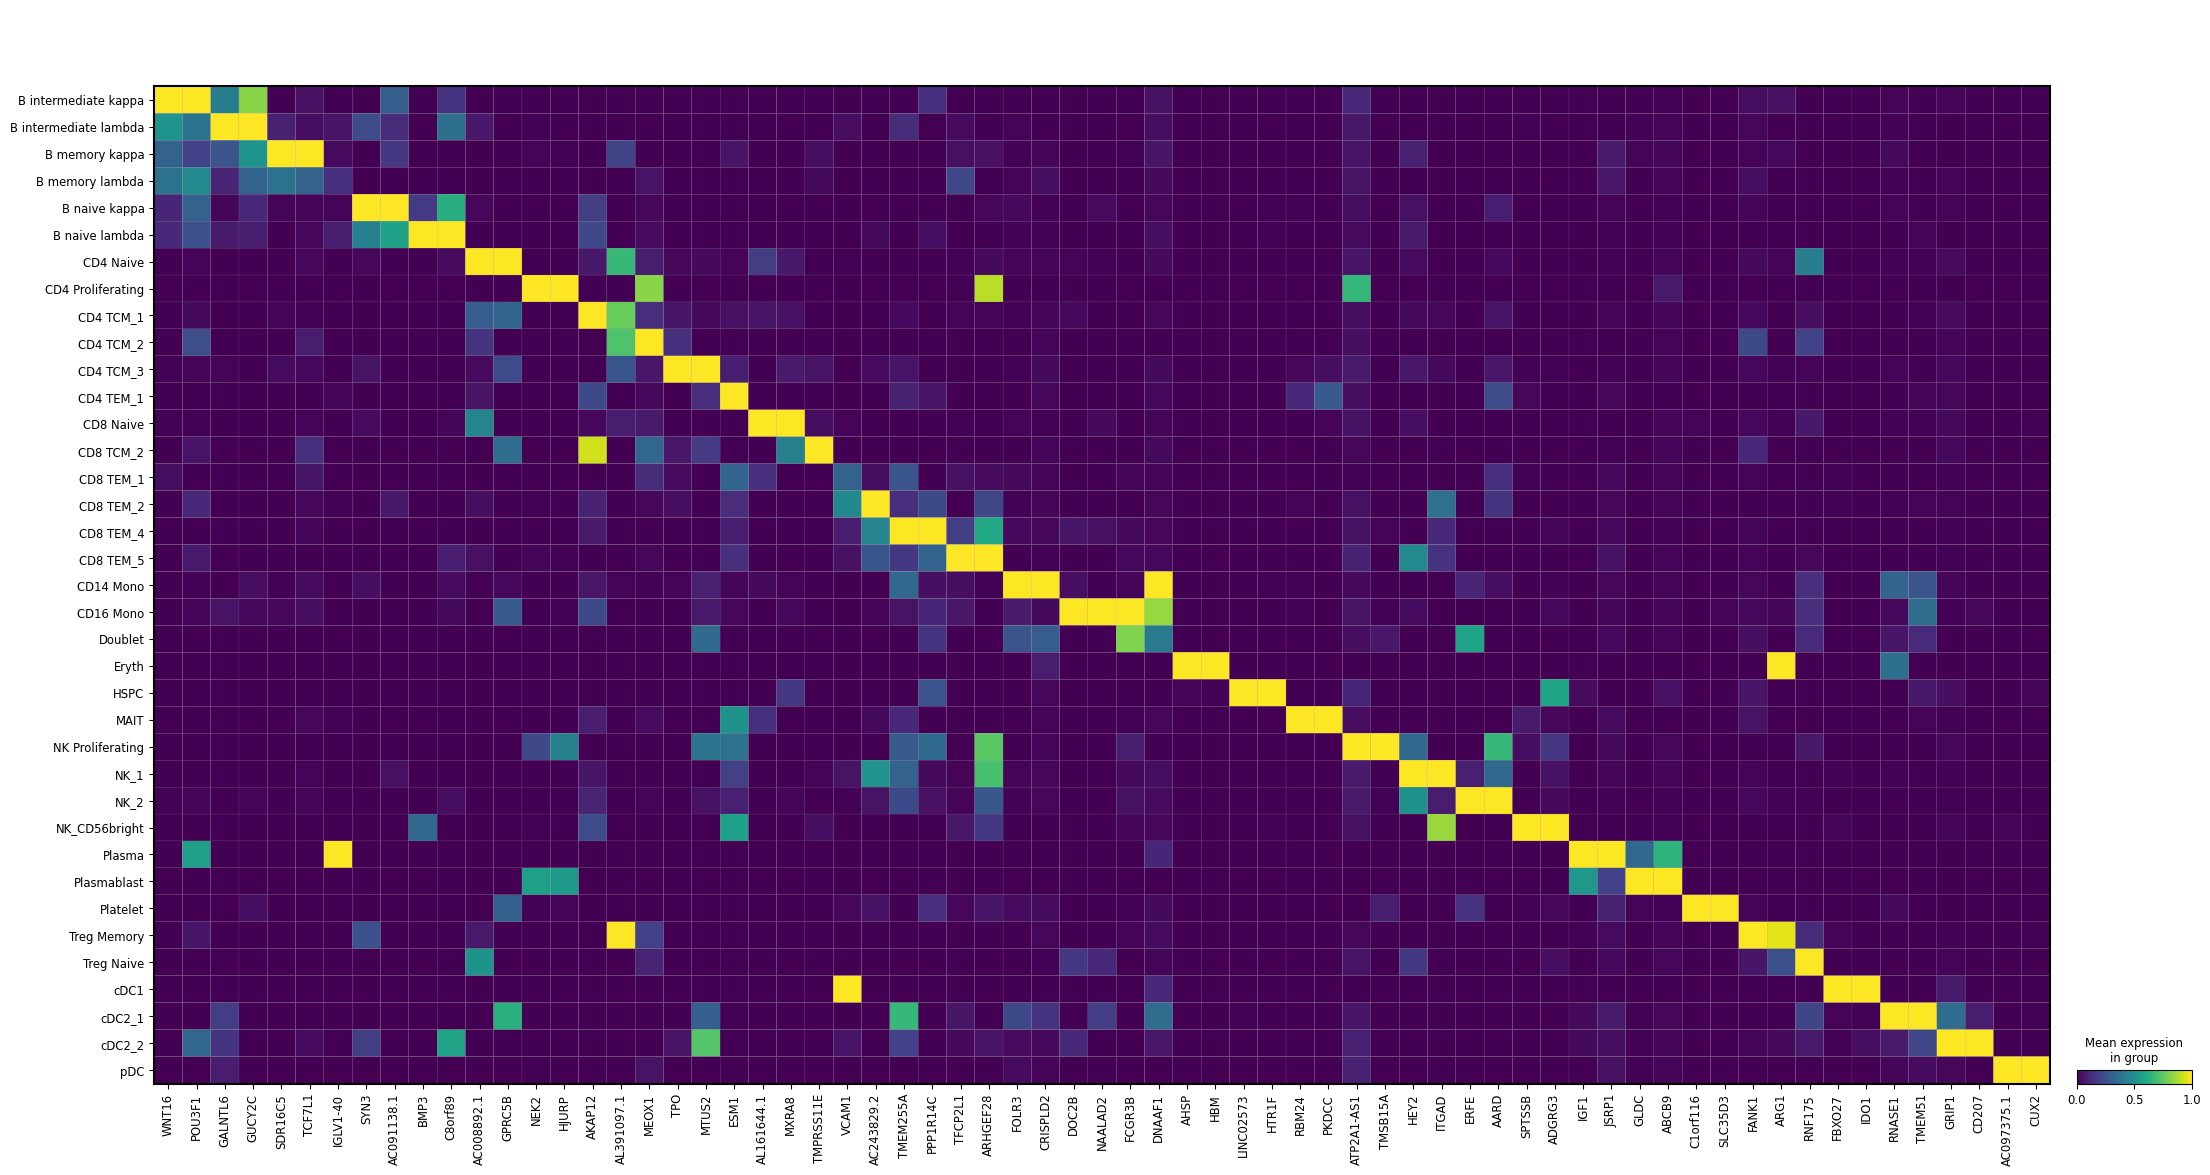

In [5]:
scherlock.plot_marker_heatmap(n_genes=2)

In [1]:
import scSherlock as sh
import scanpy as sc

/home/croizer/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
adata = sc.read_h5ad('/home/croizer/Documents/02_Analysis/02_scSherlock/hao_2021_SCT.h5ad')
cell_type_column = "celltype.l3"
patient_column = "donor"


/home/croizer/.local/lib/python3.10/site-packages/anndata/compat/__init__.py:363: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [4]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=20,
    n_jobs=3
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_ctype=cell_type_column,
    column_patient=patient_column,
    config=config
)

# Run the algorithm
#top_markers = scherlock.run(method="theoric")
top_markers = scherlock.run(method="empiric")


2025-03-24 13:08:45,457 - ScSherlock - INFO - Pre-filtering genes...
2025-03-24 13:08:45,457 - ScSherlock - INFO - Original dataset: 161764 cells, 20729 genes
2025-03-24 13:08:56,511 - ScSherlock - INFO - Filtered dataset: 161764 cells, 19498 genes
2025-03-24 13:08:56,512 - ScSherlock - INFO - Removed 1231 genes with low expression
2025-03-24 13:08:56,517 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 19498) data matrix
2025-03-24 13:08:56,550 - ScSherlock - INFO - Calculating theoretical scores...
Aggregating Samples: 100%|██████████| 464/464 [00:01<00:00, 409.16it/s]
/home/croizer/Documents/02_Analysis/02_scSherlock/scSherlock/scSherlock/scSherlock/sherlock_obj.py:495: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_cty

: 

In [5]:
scherlock.plot_marker_heatmap(n_genes=1)

: 

2025-03-24 11:58:20,914 - ScSherlock - INFO - Plotting 40 genes for 40 cell types using empiric model
... storing 'orig.ident' as categorical
... storing 'lane' as categorical
... storing 'donor' as categorical
... storing 'time' as categorical
... storing 'celltype.l1' as categorical
... storing 'celltype.l2' as categorical
... storing 'Phase' as categorical


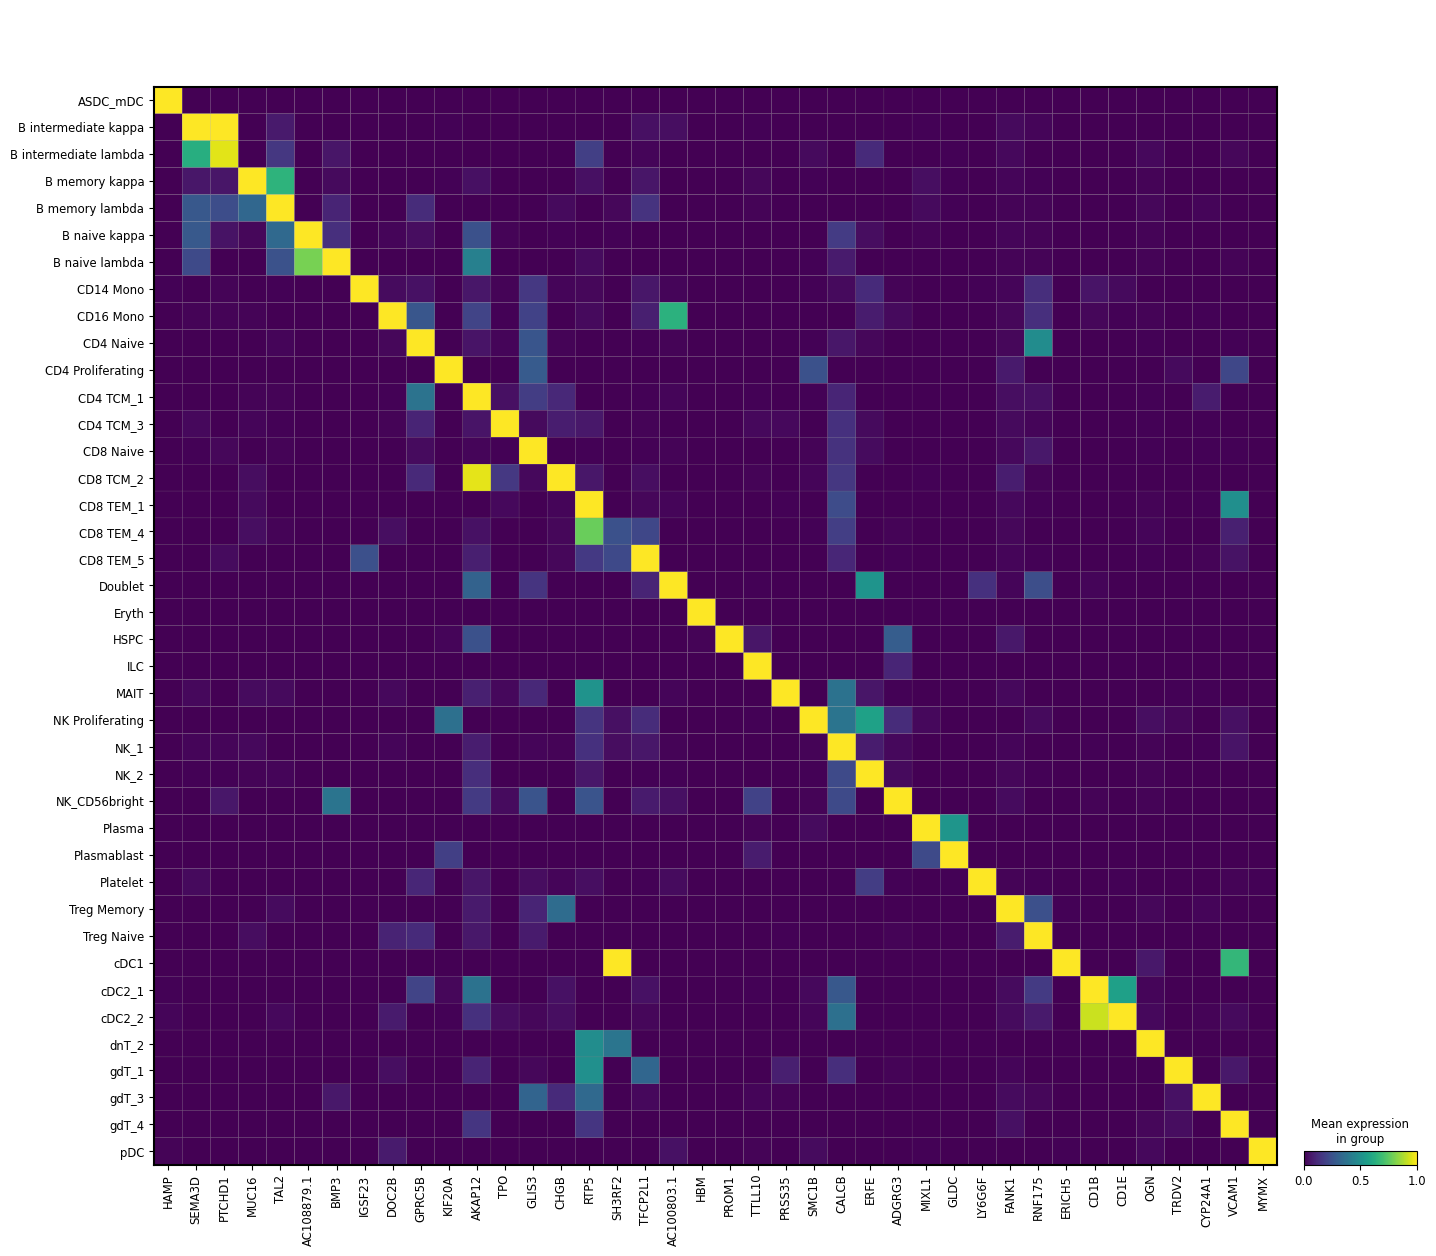

In [4]:
scherlock.plot_marker_heatmap(n_genes=1)